In [ ]:
! pip3 install -q kaggle

from google.colab import files
files.upload()

! mkdir ~/.kaggle

! cp kaggle.json /root/.kaggle

! chmod 600 /root/.kaggle/kaggle.json

! kaggle competitions download -c cassava-leaf-disease-classification

! unzip cassava-leaf-disease-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_images/3954487465.jpg  
  inflating: train_images/3954910918.jpg  
  inflating: train_images/3955391972.jpg  
  inflating: train_images/3955442838.jpg  
  inflating: train_images/3955739563.jpg  
  inflating: train_images/3955931830.jpg  
  inflating: train_images/3955972139.jpg  
  inflating: train_images/3956075690.jpg  
  inflating: train_images/3956077728.jpg  
  inflating: train_images/3956155774.jpg  
  inflating: train_images/3956271103.jpg  
  inflating: train_images/3956372146.jpg  
  inflating: train_images/3956407201.jpg  
  inflating: train_images/3956550570.jpg  
  inflating: train_images/3956605397.jpg  
  inflating: train_images/3956778160.jpg  
  inflating: train_images/3957562076.jpg  
  inflating: train_images/3957612771.jpg  
  inflating: train_images/3957807023.jpg  
  inflating: train_images/3957819631.jpg  
  inflating: train_images/395820132.jpg  
  inflating: train_images/3958304403.jpg  
  in

In [ ]:
import numpy as np
import pandas as pd
import os
import itertools
import os, stat, time
from os.path import dirname as up
import shutil
import glob
from PIL import Image

# Importing data

In [ ]:
# Ref: https://www.kaggle.com/code/kirtichauhan11/cassava-disease-classification
train_df = pd.read_csv('train.csv')
train_df.head()

image_id  label
0  1000015157.jpg      0
1  1000201771.jpg      3
2   100042118.jpg      1
3  1000723321.jpg      1
4  1000812911.jpg      3

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


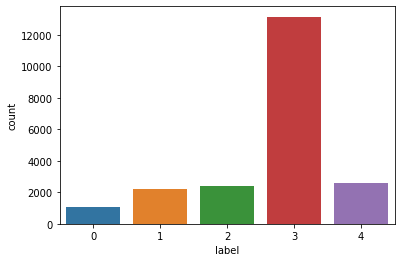

In [ ]:
import seaborn as sns
sns.countplot(train_df['label'])

In [ ]:
train_df['label'].value_counts()

3    13158
4     2577
2     2386
1     2189
0     1087
Name: label, dtype: int64

In [ ]:
np.round((train_df['label'].value_counts()/len(train_df['label'])) * 100, 2)

3    61.49
4    12.04
2    11.15
1    10.23
0     5.08
Name: label, dtype: float64

In [ ]:
import json

with open('label_num_to_disease_map.json') as file:
    print(json.dumps(json.loads(file.read()), indent = 4))

{
    "0": "Cassava Bacterial Blight (CBB)",
    "1": "Cassava Brown Streak Disease (CBSD)",
    "2": "Cassava Green Mottle (CGM)",
    "3": "Cassava Mosaic Disease (CMD)",
    "4": "Healthy"
}


# Exploratory data analysis

Class 0

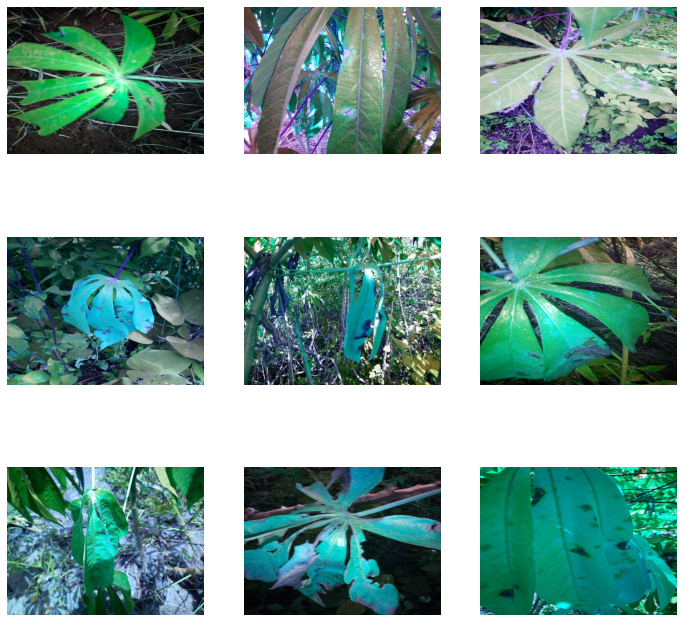

In [ ]:
import cv2
import matplotlib.pyplot as plt

sample = train_df[train_df.label == 0].sample(9)
plt.figure(figsize = (12, 12))

for ind, (image_id, label) in enumerate(zip(sample.image_id, sample.label)):
    plt.subplot(3, 3, ind + 1)
    image = cv2.imread(os.path.join('train_images', image_id))
    plt.imshow(image)
    plt.axis('off')

plt.show()

Class 1

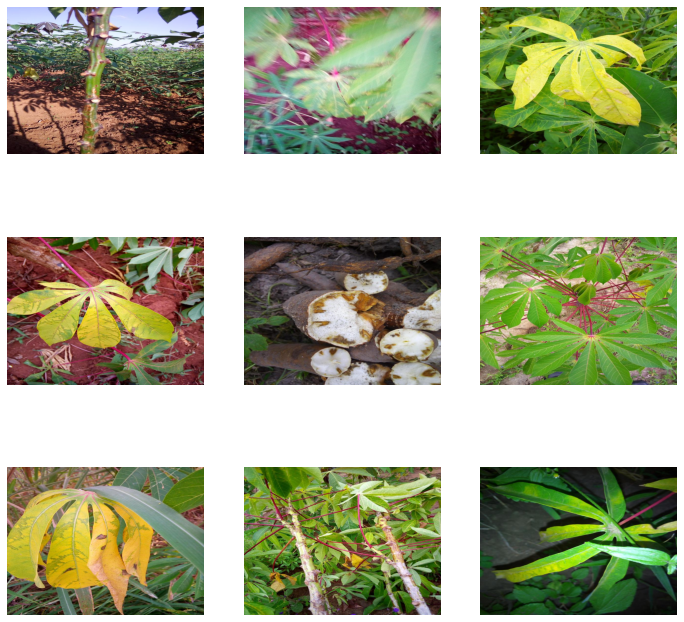

In [ ]:
sample = train_df[train_df.label == 1].sample(9)

plt.figure(figsize = (12, 12))

for ind, (image_id, label) in enumerate(zip(sample.image_id, sample.label)):
    plt.subplot(3, 3, ind + 1)
    image = cv2.imread(os.path.join('train_images', image_id))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis('off')

plt.show()

Class 2

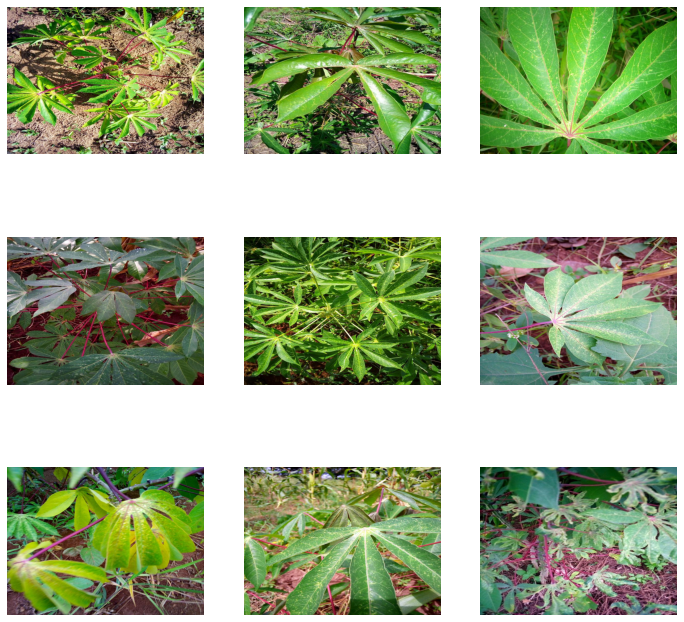

In [ ]:
sample = train_df[train_df.label == 2].sample(9)

plt.figure(figsize=(12,12))

for ind, (image_id, label) in enumerate(zip(sample.image_id, sample.label)):
    plt.subplot(3, 3, ind + 1)
    image = cv2.imread(os.path.join("train_images", image_id))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")
    
plt.show()

Class 3

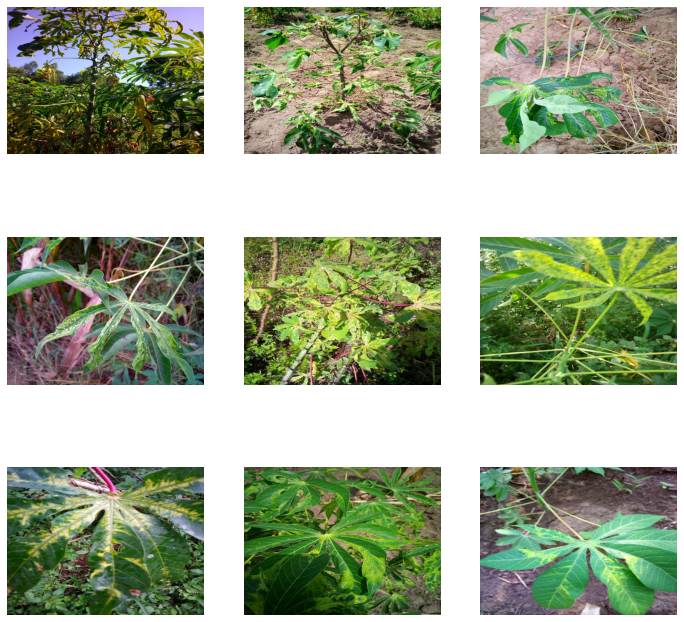

In [ ]:
sample = train_df[train_df.label == 3].sample(9)
plt.figure(figsize=(12,12))
for ind, (img_id, lab) in enumerate(zip(sample.image_id, sample.label)):
    plt.subplot(3,3,ind+1)
    image = cv2.imread(os.path.join("train_images", img_id))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")
plt.show()

Class 4

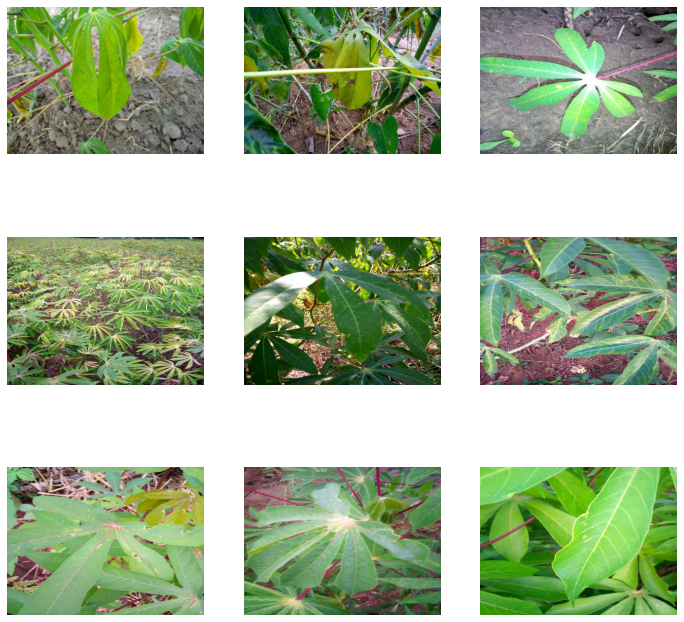

In [ ]:
sample = train_df[train_df.label == 4].sample(9)

plt.figure(figsize=(12,12))

for ind, (img_id, lab) in enumerate(zip(sample.image_id, sample.label)):
    plt.subplot(3,3,ind+1)
    image = cv2.imread(os.path.join("train_images", img_id))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")

plt.show()

In [ ]:

from sklearn.metrics import accuracy_score

y_pred = [3] * len(train_df.label)
print("The baseline accuracy is {}".format(accuracy_score(y_pred, train_df.label)))

The baseline accuracy is 0.6149460204701593


This shows thate there are around 61% leaves of category 3 alone.

# Training and Testing data

In [ ]:
img_size = 70

In [ ]:
from glob import glob
data = glob('train_images/*.jpg', recursive = True)

In [ ]:
import cv2

images = list()

for i in data:
    if i.endswith('.jpg'):
        img = cv2.imread(i)
        img_1 = cv2.resize(img, (img_size, img_size))
        images.append(img_1)

In [ ]:
x = np.stack(images)

In [ ]:
x = x / 255

In [ ]:
from tensorflow.keras.utils import to_categorical

labels = train_df['label'].tolist()

y = to_categorical(labels)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.25)

# Model

In [ ]:
b = 64 # Batch Size

# Data Augmentation

In [ ]:
train_df['label'] = train_df['label'].astype('str')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.2,
)

In [ ]:
# Generating training data

train_datagen = gen.flow_from_dataframe(
    train_df,
    directory = 'train_images',
    batch_size = b,
    target_size = (img_size, img_size),
    subset = 'training',
    seed = 42,
    x_col = 'image_id',
    y_col = 'label',
    class_mode = 'categorical'
)

Found 17118 validated image filenames belonging to 5 classes.


In [ ]:
val_gen = ImageDataGenerator(
    validation_split = 0.25
)

In [ ]:
# Generating validation data

val_datagen = val_gen.flow_from_dataframe(
    train_df,
    directory = 'train_images',
    batch_size = b,
    target_size = (img_size, img_size),
    subset = 'validation',
    seed = 42,
    x_col = 'image_id',
    y_col = 'label',
    class_mode = 'categorical'
)

Found 5349 validated image filenames belonging to 5 classes.


In [ ]:
len(train_datagen), len(val_datagen)

(268, 84)

In [ ]:
# Get the next batch of images and labels

img, label = next(train_datagen)

In [ ]:
label

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0.

In [ ]:
Steps_per_train = train_datagen.n / train_datagen.batch_size

Steps_per_val =  val_datagen.n / val_datagen.batch_size

In [ ]:
Steps_per_train, Steps_per_val

(267.46875, 83.578125)

# Convolution Neural Network

In [ ]:
import tensorflow as tf

from tensorflow.keras import models, layers
from tensorflow.keras.layers import GlobalAveragePooling2D, Flatten, Dense, Dropout

In [ ]:
newModel = models.Sequential([                       
        layers.Conv2D(256, kernel_size = (3, 3), activation = 'relu', input_shape = (img_size, img_size, 3)),
        layers.Conv2D(256, kernel_size = (3, 3), activation = 'relu', input_shape = (img_size, img_size, 3)),
        layers.MaxPool2D(pool_size = 2, strides = 2),

        layers.Conv2D(256, kernel_size = (3, 3), activation = 'relu', input_shape = (img_size, img_size, 3)),
        layers.MaxPool2D(pool_size = 2, strides = 2),

        layers.BatchNormalization(),

        layers.Conv2D(128, kernel_size = (3, 3), activation = 'relu', input_shape = (img_size, img_size, 3)),
        layers.MaxPool2D(pool_size = 2, strides = 2),

        layers.GlobalAveragePooling2D(),
        layers.Flatten(),
        layers.Dense(256, activation = 'relu'),
        layers.Dropout(0.3),
        layers.Dense(1024, activation = 'relu'),

        layers.Dense(5, activation = 'softmax')
])

loss = tf.keras.losses.CategoricalCrossentropy(
        label_smoothing = 0.0001,
        name = 'categorical_crossentropy'
        )

m = [
    'acc', 
    tf.keras.metrics.Precision(), 
    tf.keras.metrics.Recall(), 
    tf.keras.metrics.AUC()
    ]

newModel.compile(optimizer = tf.keras.optimizers.Adam(lr = 1e-4),
              loss = loss,
              metrics = m)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
newModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 68, 68, 256)       7168      
                                                                 
 conv2d_9 (Conv2D)           (None, 66, 66, 256)       590080    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 33, 33, 256)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 31, 31, 256)       590080    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 256)      0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 15, 15, 256)     

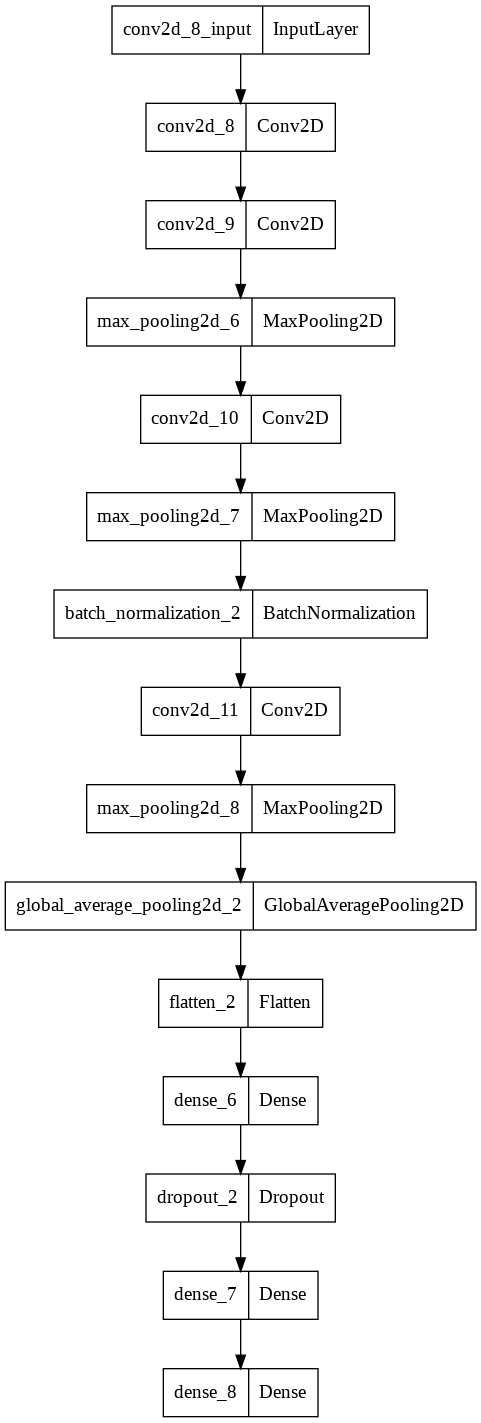

In [ ]:
tf.keras.utils.plot_model(newModel)

In [ ]:
new_history_2 = newModel.fit(train_datagen, epochs = 25, validation_data = val_datagen, batch_size = 64)

Epoch 1/25
268/268 [==============================] - 170s 630ms/step - loss: 1.0453 - acc: 0.6276 - precision_1: 0.7355 - recall_1: 0.5144 - auc_1: 0.8559 - val_loss: 0.9977 - val_acc: 0.6375 - val_precision_1: 0.7181 - val_recall_1: 0.5833 - val_auc_1: 0.8731
Epoch 2/25
268/268 [==============================] - 168s 625ms/step - loss: 0.9386 - acc: 0.6543 - precision_1: 0.7776 - recall_1: 0.5421 - auc_1: 0.8867 - val_loss: 1.7265 - val_acc: 0.2591 - val_precision_1: 0.4871 - val_recall_1: 0.0563 - val_auc_1: 0.5516
Epoch 3/25
268/268 [==============================] - 167s 622ms/step - loss: 0.8878 - acc: 0.6687 - precision_1: 0.7907 - recall_1: 0.5512 - auc_1: 0.9000 - val_loss: 0.8814 - val_acc: 0.6620 - val_precision_1: 0.8068 - val_recall_1: 0.5526 - val_auc_1: 0.9012
Epoch 4/25
268/268 [==============================] - 168s 627ms/step - loss: 0.8380 - acc: 0.6847 - precision_1: 0.8045 - recall_1: 0.5696 - auc_1: 0.9114 - val_loss: 1.2595 - val_acc: 0.6373 - val_precision_1: 0.

In [ ]:
# Reduce learing rate if the learning seems to have become constant

rlronp = tf.keras.callbacks.ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.2,
    mode = 'min',
    min_lr = 1e-7,
    patience = 2,
    verbose = 1
    )

estop = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    mode = 'min',
    patience = 3, 
    verbose = 1,
    restore_best_weights = True
)

history_with_callbacks = newModel.fit(
    train_datagen,
    steps_per_epoch = Steps_per_train,
    epochs = 25,
    validation_data = val_datagen,
    validation_steps = Steps_per_val,
    callbacks = [rlronp, estop]
)

In [ ]:
newModel.save('CNN.h5')

# Evaluating the model

In [ ]:
loss, accuracy = newModel.evaluate(x_test, y_test)

In [ ]:
plt.figure(figsize = (12, 5))
plt.plot(history_with_callbacks.history['loss'])
plt.plot(history_with_callbacks.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_data', 'test_data'])
plt.title('Loss Analysis')
plt.show()

In [ ]:
plt.figure(figsize = (12, 5))
plt.plot(history_with_callbacks.history['accuracy'])
plt.plot(history_with_callbacks.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_data', 'test_data'])
plt.title('Accuracy Analysis')
plt.show()

# EfficientNetB3

In [ ]:
def create_model():
    model = models.Sequential([
        EfficientNetB3(include_top = False, weights = 'imagenet', input_shape = (img_size, img_size, 3), drop_connect_rate = 0.3),
        layers.GlobalAveragePooling2D(),
        layers.Flatten(),
        layers.Dense(256, activation = 'relu'),
        layers.Dropout(0.3),
        layers.Dense(5, activation = 'softmax')
    ])

    loss = tf.keras.losses.CategoricalCrossentropy(
        label_smoothing = 0.0001,
        name = 'categorical_crossentropy'
        )
    
    m = [
    'acc', 
    tf.keras.metrics.Precision(), 
    tf.keras.metrics.Recall(), 
    tf.keras.metrics.AUC()
    ]

    model.compile(optimizer = tf.keras.optimizers.Adam(lr = 1e-4),
              loss = loss,
              metrics = m)
    return model

model = create_model()
model.summary()

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
new_history_3 = model.fit(train_datagen, epochs = 25, validation_data = val_datagen, batch_size = 64)

In [ ]:
# Reduce learing rate if the learning seems to have become constant

rlronp = tf.keras.callbacks.ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.2,
    mode = 'min',
    min_lr = 1e-7,
    patience = 2,
    verbose = 1
    )

estop = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    mode = 'min',
    patience = 3, 
    verbose = 1,
    restore_best_weights = True
)

history_with_callbacks_1 = model.fit(
    train_datagen,
    steps_per_epoch = Steps_per_train,
    epochs = 25,
    validation_data = val_datagen,
    validation_steps = Steps_per_val,
    callbacks = [rlronp, estop]
)

In [ ]:
model.save('EfficientNetB3.h5')

# Evaluating the model

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

168/168 [==============================] - 31s 177ms/step - loss: 1.4524 - accuracy: 0.6120


In [ ]:
plt.figure(figsize = (12, 5))
plt.plot(history_with_callbacks_1.history['loss'])
plt.plot(history_with_callbacks_1.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_data', 'test_data'])
plt.title('Loss Analysis')
plt.show()

In [ ]:
plt.figure(figsize = (12, 5))
plt.plot(history_with_callbacks_1.history['accuracy'])
plt.plot(history_with_callbacks_1.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_data', 'test_data'])
plt.title('Accuracy Analysis')
plt.show()